In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DavidGlezGmz/Exploratory-Data-Analysis-EDA-/main/Sales_Expense_InputFile.csv")
data.head(5)

,ACCOUNT_ID,COUNTRY,PRODUCT,MONTH,UNIT_SALES (in Million $),TOTAL_EXPENSE (in Million $),SALESFORCE_EXPENSE (in Million $),ADVERTISEMENT_EXPENSE (in Million $),DIGITAL_EXPENSE (in Million $)
0,376306,COUNTRY 1,Drug_2,8/1/2010,61.231684,10.507271,6.100165,NaN,3.463933
1,376306,COUNTRY 1,Drug_2,9/1/2010,47.286854,11.055016,6.037500,NaN,3.830352
2,376306,COUNTRY 1,Drug_2,10/1/2010,29.143185,15.179476,8.310196,NaN,5.591070
3,376306,COUNTRY 1,Drug_2,11/1/2010,74.909233,14.764051,8.348021,NaN,5.254492
4,376306,COUNTRY 1,Drug_2,12/1/2010,37.441141,15.249345,9.054047,NaN,5.889636


In [3]:
data.shape

(29541, 9)

In [4]:
data.columns

Index(['ACCOUNT_ID', 'COUNTRY', 'PRODUCT', 'MONTH',
       'UNIT_SALES (in Million $)', 'TOTAL_EXPENSE (in Million $)',
       'SALESFORCE_EXPENSE (in Million $)',
       'ADVERTISEMENT_EXPENSE (in Million $)',
       'DIGITAL_EXPENSE (in Million $)'],
      dtype='object')

In [5]:
data.nunique()

ACCOUNT_ID                                125
COUNTRY                                     5
PRODUCT                                     3
MONTH                                      99
UNIT_SALES (in Million $)               24317
TOTAL_EXPENSE (in Million $)            29525
SALESFORCE_EXPENSE (in Million $)       29541
ADVERTISEMENT_EXPENSE (in Million $)    24853
DIGITAL_EXPENSE (in Million $)          29541
dtype: int64

In [6]:
#data.isnull().sum()
(data.isnull().sum()*100)/len(data)

ACCOUNT_ID                               0.00000
COUNTRY                                  0.00000
PRODUCT                                  0.00000
MONTH                                    0.00000
UNIT_SALES (in Million $)                0.00000
TOTAL_EXPENSE (in Million $)             0.00000
SALESFORCE_EXPENSE (in Million $)        0.00000
ADVERTISEMENT_EXPENSE (in Million $)    15.86947
DIGITAL_EXPENSE (in Million $)           0.00000
dtype: float64

In [7]:
data.describe()

,ACCOUNT_ID,UNIT_SALES (in Million $),TOTAL_EXPENSE (in Million $),SALESFORCE_EXPENSE (in Million $),ADVERTISEMENT_EXPENSE (in Million $),DIGITAL_EXPENSE (in Million $)
count,2.954100e+04,29541.000000,29541.000000,29541.000000,24853.000000,29541.000000
mean,1.920247e+06,77.467187,23.217187,13.401026,8.709343,8.867015
std,5.091865e+06,225.941719,65.255768,39.145709,27.738567,26.094870
min,7.000000e+00,0.875579,-0.020494,-0.012094,-0.955600,-0.007104
25%,2.326060e+05,13.309469,4.572869,2.216660,0.937452,1.412721
50%,4.652810e+05,38.853087,11.729950,6.497180,3.819819,4.259820
75%,6.868510e+05,78.964226,23.681341,13.649810,8.684686,9.033341
max,2.380096e+07,10762.960580,1921.314960,1152.237836,767.755145,767.869034


In [8]:
#In this case im going to apply a simply imputate using the mean...
data = data.fillna(8.709343)

In [9]:
data.isnull().sum()

ACCOUNT_ID                              0
COUNTRY                                 0
PRODUCT                                 0
MONTH                                   0
UNIT_SALES (in Million $)               0
TOTAL_EXPENSE (in Million $)            0
SALESFORCE_EXPENSE (in Million $)       0
ADVERTISEMENT_EXPENSE (in Million $)    0
DIGITAL_EXPENSE (in Million $)          0
dtype: int64

In [10]:
data['MONTH'].count()

29541

In [11]:
import matplotlib.pyplot as plt

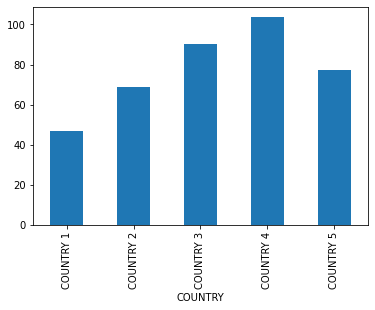

In [12]:
Sum_per_Country = data.groupby("COUNTRY")
Sum_per_Country['UNIT_SALES (in Million $)'].mean().plot(kind = "bar")

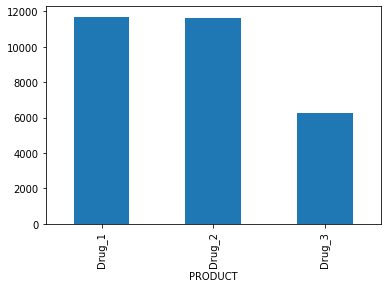

In [13]:
Sum_per_Product = data.groupby("PRODUCT")
Sum_per_Product['UNIT_SALES (in Million $)'].count().plot(kind = "bar")

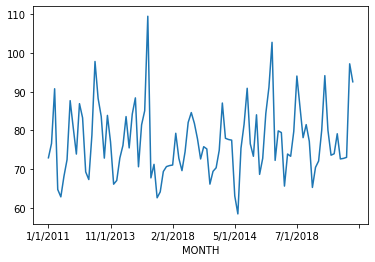

In [14]:
Sum_per_Month = data.groupby("MONTH")
Sum_per_Month['UNIT_SALES (in Million $)'].mean().plot()

In [15]:
import seaborn as sns

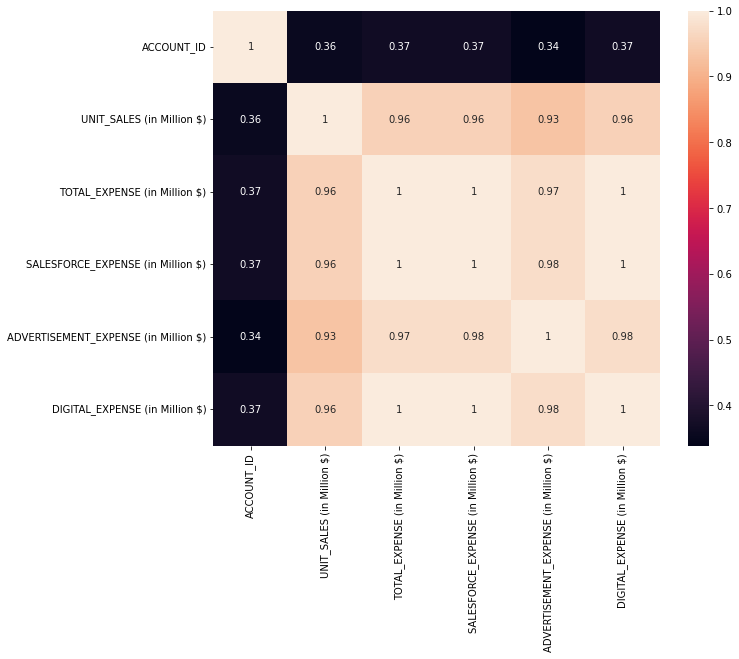

In [16]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

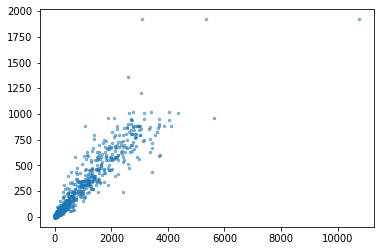

In [17]:
plt.scatter(x=data['UNIT_SALES (in Million $)'], y=data['TOTAL_EXPENSE (in Million $)'], alpha = 0.5, s=6)
plt.show()

In [18]:
df = data[['ACCOUNT_ID','MONTH', 'UNIT_SALES (in Million $)', 'TOTAL_EXPENSE (in Million $)']]
df['MONTH'] = pd.to_datetime(df['MONTH'].str[:10])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ACCOUNT_ID,MONTH,UNIT_SALES (in Million $),TOTAL_EXPENSE (in Million $)
0,376306,2010-08-01,61.231684,10.507271
1,376306,2010-09-01,47.286854,11.055016
2,376306,2010-10-01,29.143185,15.179476
3,376306,2010-11-01,74.909233,14.764051
4,376306,2010-12-01,37.441141,15.249345


In [19]:
df = df.set_index('MONTH')
df

,ACCOUNT_ID,UNIT_SALES (in Million $),TOTAL_EXPENSE (in Million $)
MONTH,,,
2010-08-01,376306,61.231684,10.507271
2010-09-01,376306,47.286854,11.055016
2010-10-01,376306,29.143185,15.179476
2010-11-01,376306,74.909233,14.764051
2010-12-01,376306,37.441141,15.249345
...,...,...,...
2018-06-01,6188,12.792047,5.632755
2018-07-01,6188,12.601030,3.336204
2018-08-01,6188,5.514425,3.442797


In [20]:
split_date = '01-Jan-2018'
data_train = df.loc[df.index <= split_date].copy()
data_test = df.loc[df.index > split_date].copy()

In [21]:
data_train

,ACCOUNT_ID,UNIT_SALES (in Million $),TOTAL_EXPENSE (in Million $)
MONTH,,,
2010-08-01,376306,61.231684,10.507271
2010-09-01,376306,47.286854,11.055016
2010-10-01,376306,29.143185,15.179476
2010-11-01,376306,74.909233,14.764051
2010-12-01,376306,37.441141,15.249345
...,...,...,...
2017-09-01,6188,24.751098,5.275161
2017-10-01,6188,20.155227,6.834391
2017-11-01,6188,12.601030,6.716483


In [22]:
data_test

,ACCOUNT_ID,UNIT_SALES (in Million $),TOTAL_EXPENSE (in Million $)
MONTH,,,
2018-02-01,376306,32.792575,8.956528
2018-03-01,376306,32.792575,8.047246
2018-04-01,376306,20.023686,8.056415
2018-05-01,376306,39.858931,7.133507
2018-06-01,376306,19.903253,8.788992
...,...,...,...
2018-06-01,6188,12.792047,5.632755
2018-07-01,6188,12.601030,3.336204
2018-08-01,6188,5.514425,3.442797


In [23]:
def create_features(df, label=None):
    df['date'] = df.index
    df['day'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    X = df[['day','weekofyear','month','year']]
    if label:
        y = df[label]
        return X, y
    return X

In [24]:
X_train, y_train = create_features(data_train, label='UNIT_SALES (in Million $)')
X_test, y_test = create_features(data_test, label='UNIT_SALES (in Million $)')
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,day,weekofyear,month,year
MONTH,,,,
2010-08-01,1,30,8,2010
2010-09-01,1,35,9,2010
2010-10-01,1,39,10,2010
2010-11-01,1,44,11,2010
2010-12-01,1,48,12,2010
...,...,...,...,...
2017-09-01,1,35,9,2017
2017-10-01,1,39,10,2017
2017-11-01,1,44,11,2017


## XGBOOST

In [25]:
#pip install xgboost
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
reg = xgb.XGBRegressor(n_estimators=1000)

In [27]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[22:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

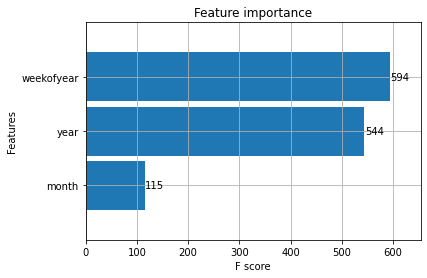

In [28]:
_ = plot_importance(reg, height=0.9)

In [29]:
data_test['number_Prediction'] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

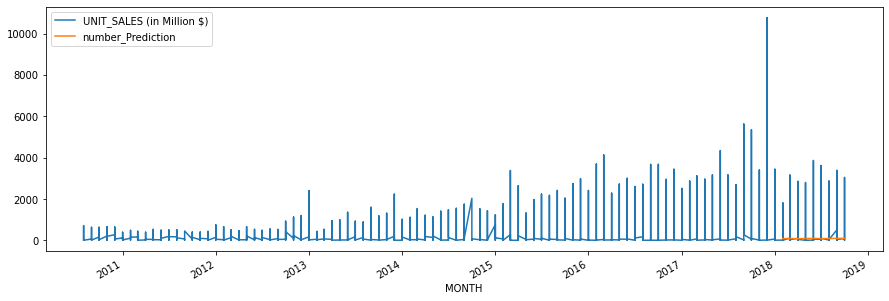

In [30]:
_ = data_all[['UNIT_SALES (in Million $)','number_Prediction']].plot(figsize=(15, 5))

## Linear Regresion

In [31]:
X = data[['UNIT_SALES (in Million $)']]
y = data['TOTAL_EXPENSE (in Million $)']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))

X_train:  23632
X_test:  5909


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
UNIT_SALES (in Million $),0.275787


In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
8450,5.829989,5.709078
1809,7.416963,7.795500
6295,4.226122,7.439518
15827,6.419993,5.162935
10529,21.356639,22.692902
...,...,...
1785,12.400239,11.668907
14936,1.779745,3.064036
23545,1.375297,2.829959
21447,64.613636,40.872960


In [37]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.2215891977980045
Mean Squared Error: 313.5454932092967
Root Mean Squared Error: 17.707215851434597
